In [1]:
# all useful imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python
import re # regular expression
import string # for finding punctuation in text
import nltk # preprocessing text
from collections import Counter 
from textblob import TextBlob

In [2]:
#Import dataset from previously obtained CSV file
restaurants_reviews = pd.read_csv("yelp_2010_2012.csv",index_col=0)
restaurants_reviews.head()

,review_body,Date,review ID,reviewer ID,product ID,useful,funny,cool,star_rating,Year,Month,Day
0,"Unlike Next, which we'd eaten at the previous ...",2012-09-22,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,0,0,0,5,2012,9,22
1,Probably one of the best meals I've had ever. ...,2012-09-22,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,0,0,0,5,2012,9,22
2,Service was impeccable. Experience and present...,2012-09-19,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,0,0,2,3,2012,9,19
3,"The problem with places like this, given the e...",2012-09-06,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,3,0,8,3,2012,9,6
4,I have no idea how to write my review - dining...,2012-09-09,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,0,2,1,5,2012,9,9


In [3]:
#Shape of the dataset
restaurants_reviews.shape

(40491, 12)

## 2. Cleaning the data

In [4]:
restaurants_reviews.dtypes

review_body    object
Date           object
review ID      object
reviewer ID    object
product ID     object
useful          int64
funny           int64
cool            int64
star_rating     int64
Year            int64
Month           int64
Day             int64
dtype: object

In [5]:
# We check for null values in columns
restaurants_reviews.columns[restaurants_reviews.isnull().any()].tolist()

[]

In [6]:
# We check for empty strings
restaurants_reviews.columns[(restaurants_reviews=='').any()].tolist()

/anaconda3/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


[]

## 3. Understanding what's in the data

### a. Distributions

In [11]:
# number of restaurants
print('we are dealing with', restaurants_reviews.groupby('product ID').count().shape[0], 'restaurants.')

we are dealing with 127 restaurants.


In [12]:
# We add a new column to get the distribution of reviews over the years
restaurants_reviews['year_of_review'] = restaurants_reviews.Date.map(lambda x : int(x[:4]))

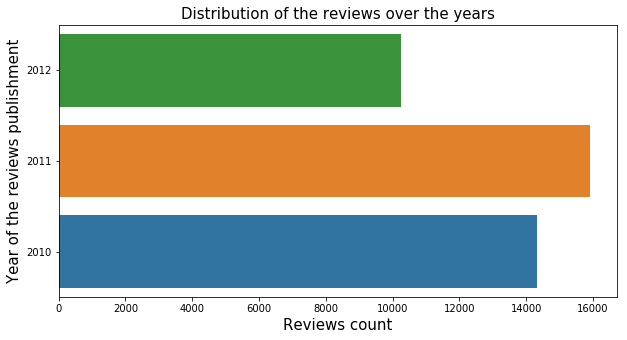

In [13]:
# Plotting the distribution of the reviews over the years
plt.figure(figsize=(10, 5))
p = sns.countplot(data = restaurants_reviews, y = 'year_of_review', orient="h").invert_yaxis()
plt.title("Distribution of the reviews over the years",fontsize=15)
plt.xlabel('Reviews count',fontsize=15)
plt.ylabel('Year of the reviews publishment',fontsize=15);

### b. Business with most Five Star Reviews 

In [14]:
# We analyse ratings of reviews by getting the restaurants with most Five Star rating scores. 
ratings = restaurants_reviews[restaurants_reviews.star_rating == 5].groupby(['product ID', 'star_rating']).agg('size').to_frame('count').reset_index().sort_values(by='count', ascending=False)
ratings[:20]

,product ID,star_rating,count
38,HOJqzz1WvOmeR9oESJ4d9A,5,812
70,boE4Ahsssqic7o5wQLI04w,5,512
83,jGiKIJCVLZHXQDSNnSLPsw,5,505
98,pbEiXam9YJL3neCYHGwLUA,5,447
86,m5_GCJP2W4zEJnyVgxa3eA,5,425
44,LMaoM2Ue2BR_HI9ba3JsZg,5,367
93,o54U2VkQama8FI30qDkWvw,5,367
31,DXwSYgiXqIVNdO9dazel6w,5,351
59,WBU0yq9J8qiYQfI_fh2P1Q,5,344
21,8d_DiHWB-pjBVW3a7D8EWg,5,341


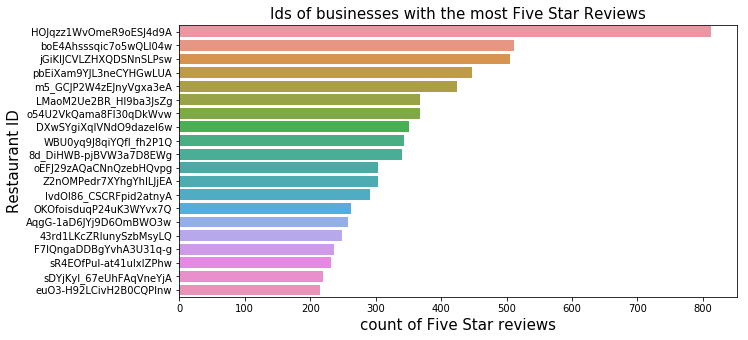

In [15]:
plt.figure(figsize=(10, 5))
#p = sns.barplot(x ='alias', y = 'count', data = ratings[:10], orient="h").invert_yaxis();
p = sns.barplot(data = ratings[:20], x='count', y = 'product ID', orient="h")
plt.title("Ids of businesses with the most Five Star Reviews",fontsize=15)
plt.xlabel('count of Five Star reviews',fontsize=15)
plt.ylabel('Restaurant ID',fontsize=15);

### c. Useful, funny and cool reviews

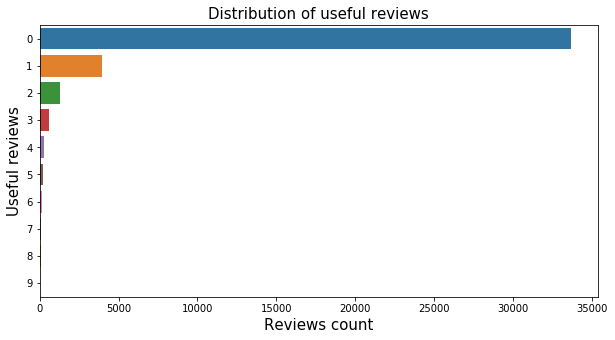

In [16]:
# Plotting the distribution of useful reviews and count
plt.figure(figsize=(10, 5))
sns.countplot(data = restaurants_reviews, y = 'useful', orient="h",order=pd.value_counts(restaurants_reviews['useful']).iloc[:10].index)
plt.title("Distribution of useful reviews",fontsize=15)
plt.xlabel('Reviews count',fontsize=15)
plt.ylabel('Useful reviews',fontsize=15);

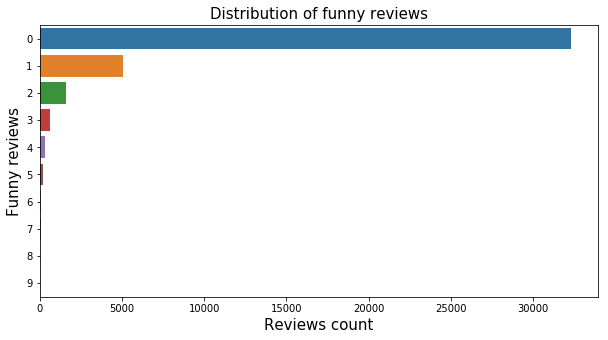

In [17]:
# Plotting the distribution of funny reviews and count
plt.figure(figsize=(10, 5))
sns.countplot(data = restaurants_reviews, y = 'funny', orient="h",order=pd.value_counts(restaurants_reviews['funny']).iloc[:10].index)
plt.title("Distribution of funny reviews",fontsize=15)
plt.xlabel('Reviews count',fontsize=15)
plt.ylabel('Funny reviews',fontsize=15);

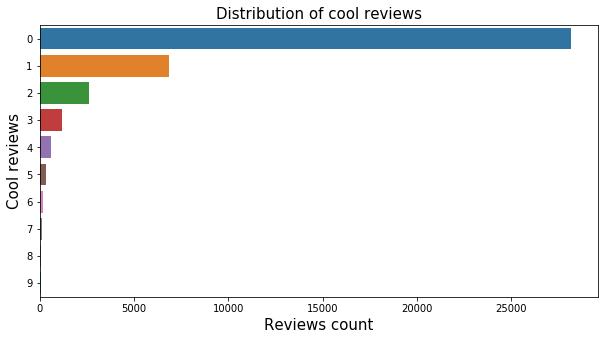

In [18]:
# Plotting the distribution of cool reviews and count
plt.figure(figsize=(10, 5))
sns.countplot(data = restaurants_reviews, y = 'cool', orient="h",order=pd.value_counts(restaurants_reviews['cool']).iloc[:10].index)
plt.title("Distribution of cool reviews",fontsize=15)
plt.xlabel('Reviews count',fontsize=15)
plt.ylabel('Cool reviews',fontsize=15);

In [19]:
l = [restaurants_reviews.funny.sum(), restaurants_reviews.useful.sum(), restaurants_reviews.cool.sum()]

In [20]:
restaurants_reviews.funny.sum()

16284

In [21]:
restaurants_reviews.useful.sum()

15370

In [22]:
restaurants_reviews.cool.sum()

26942

In [23]:
df = pd.DataFrame(dict(x=['useful','funny','cool'], y=l))

<Figure size 720x360 with 0 Axes>

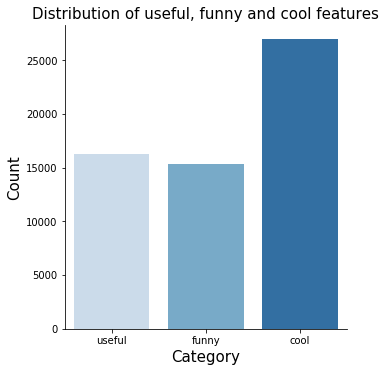

In [24]:
plt.figure(figsize=(10, 5))
sns.catplot("x","y", data=df,kind="bar",palette="Blues")
plt.title("Distribution of useful, funny and cool features",fontsize=15)
plt.xlabel('Category',fontsize=15)
plt.ylabel('Count',fontsize=15);

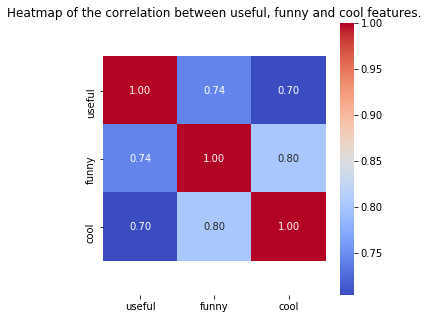

In [25]:
# Plotting the heatmap.
plt.figure(figsize=(5,5))
ax = sns.heatmap(restaurants_reviews[['useful','funny','cool']].corr(), annot=True, fmt=".2f", cmap = "coolwarm")

# This is a small fix to have the heatmap not be cropped on the top and bottom parts.
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Heatmap of the correlation between useful, funny and cool features.')

ax;

In [26]:
restaurants_reviews.head()

,review_body,Date,review ID,reviewer ID,product ID,useful,funny,cool,star_rating,Year,Month,Day,year_of_review
0,"Unlike Next, which we'd eaten at the previous ...",2012-09-22,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,0,0,0,5,2012,9,22,2012
1,Probably one of the best meals I've had ever. ...,2012-09-22,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,0,0,0,5,2012,9,22,2012
2,Service was impeccable. Experience and present...,2012-09-19,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,0,0,2,3,2012,9,19,2012
3,"The problem with places like this, given the e...",2012-09-06,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,3,0,8,3,2012,9,6,2012
4,I have no idea how to write my review - dining...,2012-09-09,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,0,2,1,5,2012,9,9,2012


## 4. Enriching, filtering, transforming the data according to your needs.

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a. Enriching the data

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; b. Transforming the text in reviews to remove noise

In [27]:
# Introduce a preprocessing function to get rid of stopwords in the description of reviews
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  # get rid of noise
    x = [w for w in x.split() if w not in set(stopwords)]  # remove stopwords
    return ' '.join(x) # then join the text again

In [28]:
#Constructing a list of stopwords

#download all stopwords from the nltk library
nltk.download('stopwords')

#get a list of all english stopwords
i = nltk.corpus.stopwords.words('english')

#get a list of all punctuations
j = list(string.punctuation)

stopwords = set(i).union(j)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aymenayadi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
# filter the column description according to the stopwords 
restaurants_reviews["review_body_filtered"]= restaurants_reviews.apply(lambda row : preprocess(row["review_body"]) , axis = 1)
restaurants_reviews

,review_body,Date,review ID,reviewer ID,product ID,useful,funny,cool,star_rating,Year,Month,Day,year_of_review,review_body_filtered
0,"Unlike Next, which we'd eaten at the previous ...",2012-09-22,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,0,0,0,5,2012,9,22,2012,unlike next wed eaten previous night dish comp...
1,Probably one of the best meals I've had ever. ...,2012-09-22,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,0,0,0,5,2012,9,22,2012,probably one best meals ive ever performance f...
2,Service was impeccable. Experience and present...,2012-09-19,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,0,0,2,3,2012,9,19,2012,service impeccable experience presentation coo...
3,"The problem with places like this, given the e...",2012-09-06,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,3,0,8,3,2012,9,6,2012,problem places like given exhorbitant cost med...
4,I have no idea how to write my review - dining...,2012-09-09,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,0,2,1,5,2012,9,9,2012,idea write review dining alinea brings whole d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61535,If you want seafood this is place to go. It is...,2011-10-08,BOxgSHru1VycS,kHIFPG3NLehDo-6uRUjWYA,_KI0Y2UO68kJuTFUKucaXQ,0,0,1,5,2011,10,8,2011,want seafood place go warehouse man help nice ...
61536,I've passed this place a bunch of times on my ...,2012-04-07,I6pazvTPUqRtU,fUXNHG4x1AN9oPpBSpCtUw,_KI0Y2UO68kJuTFUKucaXQ,1,0,0,5,2012,4,7,2012,ive passed place bunch times way olympic north...
61538,This place is amazing. The food is great and y...,2012-05-06,hLwn6zw,OXRKydSyzC35n2fNUnbopg,XvP-kanjF6SpchosRk0N5g,0,0,0,5,2012,5,6,2012,place amazing food great cannot beat price unf...
61539,OK went back the next day as I was driving by ...,2011-01-08,KEkOzeO9YJ,NE8ULc362aFvnkTDgvZbcA,XvP-kanjF6SpchosRk0N5g,0,1,2,2,2011,1,8,2011,ok went back next day driving lunchtime steak ...


## 4. Deep dive analysis of top Five Stars rated businesses 

### HOJqzz1WvOmeR9oESJ4d9A

In [30]:
# Get all the reviews of BBQ Supply CO restaurant
restau1 = restaurants_reviews[restaurants_reviews['product ID'] == 'HOJqzz1WvOmeR9oESJ4d9A']
restau1.head()

,review_body,Date,review ID,reviewer ID,product ID,useful,funny,cool,star_rating,Year,Month,Day,year_of_review,review_body_filtered
751,UMMMMMM YEAAAAAAAAAAAAA this is the best joint...,2012-09-21,R7rUKkrkO6O-ymK5Svtc-w,rGeb9gC4FDtUqFt5PfKbeg,HOJqzz1WvOmeR9oESJ4d9A,0,2,0,5,2012,9,21,2012,ummmmmm yeaaaaaaaaaaaaa best joint earth hot d...
752,I'm not sure what to say that hasn't been said...,2012-09-20,uacV8gZEFuuquXlaWr5qxw,9JUezU-3ytiyBSUnWZvR0g,HOJqzz1WvOmeR9oESJ4d9A,0,0,1,5,2012,9,20,2012,im sure say hasnt said expect wait expect get ...
753,A unique experience.... Went here recently aft...,2012-09-20,866BauokCfO3I7bGwBgsHQ,9Zu4BPDntg_52YmNwViyOA,HOJqzz1WvOmeR9oESJ4d9A,0,0,1,4,2012,9,20,2012,unique experience went recently reading yelp f...
754,"First of all, just make peace with the fact th...",2012-09-14,8Z,Fni24umaCsmdjYPEsB_W1Q,HOJqzz1WvOmeR9oESJ4d9A,0,0,2,5,2012,9,14,2012,first make peace fact youre going standing lin...
755,"Ok, so I am going to state up front that I am ...",2012-09-01,v7MYqQhoFrSoeHGUNUd1iA,1krzsfsDAyAd9CGGBOhvFw,HOJqzz1WvOmeR9oESJ4d9A,2,2,2,5,2012,9,1,2012,ok going state front hot dog fan tough time pa...


### Word Cloud of most Five Stars rated restaurant

We make a word cloud of this restaurant reviews to have an idea about most used words over the reviews

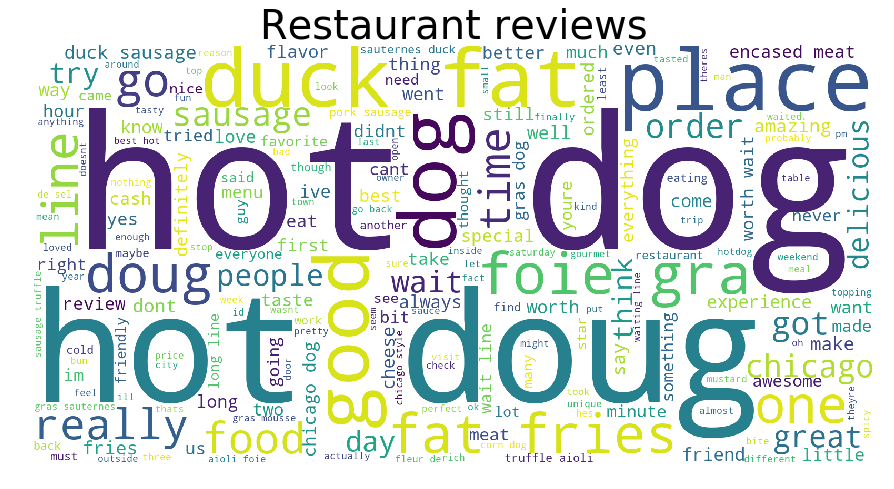

In [31]:
wc = WordCloud(background_color="white",width=1600, height=800, random_state=1, max_words=200)
# Join all strings together from the filtered description column to obtain all review text for the restaurant
wc.generate(' '.join(restau1['review_body_filtered']))


plt.figure(figsize=(15,10))
# Add title to figure
plt.title("Restaurant reviews", fontsize=40)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=10)

In [32]:
# We get the 20 most occuring words over the reviews. 

# Pass the split_it list to instance of Counter class. 
splitted = restau1['review_body_filtered'].apply(lambda x: x.split()).to_list()
flatten = [item for sublist in splitted for item in sublist]
counter = Counter(flatten) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = counter.most_common(20) 
most_occur

[('hot', 2104),
 ('dog', 1528),
 ('fries', 1127),
 ('line', 1078),
 ('duck', 1052),
 ('sausage', 1009),
 ('dougs', 953),
 ('dogs', 882),
 ('wait', 864),
 ('place', 791),
 ('good', 783),
 ('chicago', 729),
 ('fat', 697),
 ('get', 674),
 ('gras', 629),
 ('foie', 606),
 ('doug', 589),
 ('go', 550),
 ('one', 546),
 ('worth', 535)]

In [33]:
#Now we add a column which has the sentiment values of the each review posted for BBQ Supply Co, to see how the 
#author of this review feels about the restaurant.

#Create Text Blob Object and draw out the sentiment of each review by returning a value between -1.0 (extreme negative) 
#and 1.0 (extreme positive).
restau1['sentiment_analysis'] = restau1['review_body_filtered'].apply(lambda x: TextBlob(x).sentiment.polarity)
restau1 = restau1.sort_values(by='sentiment_analysis', ascending=False)
restau1[:10]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,review_body,Date,review ID,reviewer ID,product ID,useful,funny,cool,star_rating,Year,Month,Day,year_of_review,review_body_filtered,sentiment_analysis
53414,awesome food. hits the spot whenever i have a ...,2010-12-18,Z7oH42ttzgP5JKcmAVsrIg,x7wIQTZJ13kyvTMGXCZIFg,HOJqzz1WvOmeR9oESJ4d9A,0,0,0,5,2010,12,18,2010,awesome food hits spot whenever craving,1.00
53296,perfect everytime. doug will you marry me?\n,2012-05-17,WWnS0Otqb4x-adkoY8J6mQ,hsgzMownXatnpH8KZbwl_A,HOJqzz1WvOmeR9oESJ4d9A,0,0,0,5,2012,5,17,2012,perfect everytime doug marry,1.00
2125,Best food baby maker in Chicago.\n,2010-11-22,WRVHNk74erdgi8AlBlSbTg,qHniQVr0ej3vYZZY-7_JnQ,HOJqzz1WvOmeR9oESJ4d9A,2,1,0,5,2010,11,22,2010,best food baby maker chicago,1.00
2221,What can I say that hasn't been said already? ...,2010-11-14,vJm9zALoSJeOiNDQa4xowQ,G1BBiiot4W5Wa7xdEXEpFg,HOJqzz1WvOmeR9oESJ4d9A,0,1,0,5,2010,11,14,2010,say hasnt said already place best,1.00
53576,BEST SAUSAGES in town! I recommend you go here...,2010-01-28,ohvqe_fydEAkZXUCJpex9w,AQqPycLRwSdSwhRtGCPUBw,HOJqzz1WvOmeR9oESJ4d9A,0,0,0,5,2010,1,28,2010,best sausages town recommend go expire,1.00
53327,anyone who doesnt give this place 5 stars must...,2011-11-08,jrc6k_TLVIhdIRT74p5-2w,veeqDsGCsQ8nmMTib50I_A,HOJqzz1WvOmeR9oESJ4d9A,0,0,0,5,2011,11,8,2011,anyone doesnt give place stars must developmen...,1.00
53548,Why bother even writing a review. It's all bee...,2010-03-22,axjPYtR431-lP766WSkmyw,xARYlm1px6NzIrrkkwQV6g,HOJqzz1WvOmeR9oESJ4d9A,0,0,0,5,2010,3,22,2010,bother even writing review said delicious inve...,1.00
53565,Best dogs in the city! Great service\n,2010-02-10,gwXd0IqG8HnXzGS4CgH_Rw,L-XTWkepNmyg2aLODzZAig,HOJqzz1WvOmeR9oESJ4d9A,0,0,0,5,2010,2,10,2010,best dogs city great service,0.90
53525,good dogs! THE fries are the best\n,2010-05-27,oUW9TyYubj_O79461ZQM6A,nWqNypEUD2p9H0FyzbNg2w,HOJqzz1WvOmeR9oESJ4d9A,0,0,0,4,2010,5,27,2010,good dogs fries best,0.85
2012,delicious and a good price!\n,2012-06-12,JWI61FgQqiGfZ1Z2Iz2fWA,ofZzcj1oiHS64f7jbGCXxQ,HOJqzz1WvOmeR9oESJ4d9A,0,0,0,5,2012,6,12,2012,delicious good price,0.85


In [34]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

#import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [35]:
# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in restau1['review_body_filtered']]

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aymenayadi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw]

# View bigrams for the first tweet
terms_bigram[0]

[('awesome', 'food'),
 ('food', 'hits'),
 ('hits', 'spot'),
 ('spot', 'whenever'),
 ('whenever', 'craving')]

In [37]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('hot', 'dougs'), 839),
 (('duck', 'fat'), 673),
 (('hot', 'dog'), 664),
 (('foie', 'gras'), 567),
 (('fat', 'fries'), 566),
 (('hot', 'dogs'), 443),
 (('duck', 'sausage'), 241),
 (('chicago', 'dog'), 150),
 (('worth', 'wait'), 136),
 (('wait', 'line'), 118),
 (('gras', 'dog'), 117),
 (('encased', 'meats'), 100),
 (('pork', 'sausage'), 97),
 (('truffle', 'aioli'), 96),
 (('sauternes', 'duck'), 94),
 (('gras', 'sauternes'), 93),
 (('best', 'hot'), 84),
 (('gras', 'mousse'), 80),
 (('long', 'line'), 78),
 (('encased', 'meat'), 77)]

In [38]:
bigram_df = pd.DataFrame(bigram_counts.most_common(10),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(hot, dougs)",839
1,"(duck, fat)",673
2,"(hot, dog)",664
3,"(foie, gras)",567
4,"(fat, fries)",566
5,"(hot, dogs)",443
6,"(duck, sausage)",241
7,"(chicago, dog)",150
8,"(worth, wait)",136
9,"(wait, line)",118


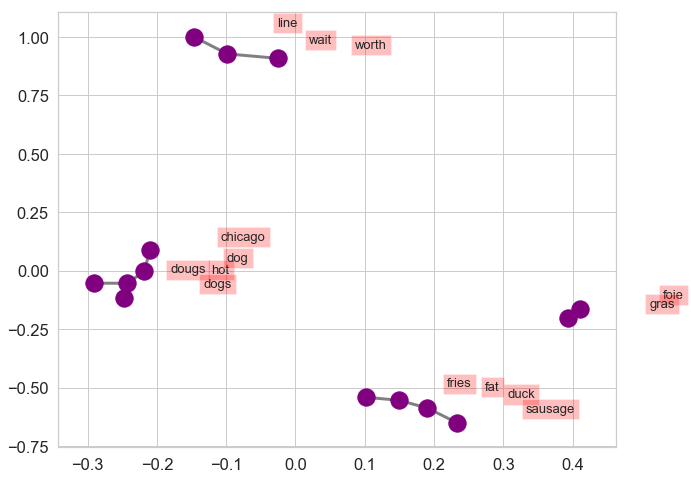

In [39]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

### boE4Ahsssqic7o5wQLI04w

In [40]:
# Get all the reviews of BBQ Supply CO restaurant
restau2 = restaurants_reviews[restaurants_reviews['product ID'] == 'boE4Ahsssqic7o5wQLI04w']
restau2.head()

,review_body,Date,review ID,reviewer ID,product ID,useful,funny,cool,star_rating,Year,Month,Day,year_of_review,review_body_filtered
4564,I never get tired of going here. It's definite...,2012-09-20,qXniFNnJx5Lfy3UMpXQUUg,JCVqRDQHeSJl0xoevLr1DA,boE4Ahsssqic7o5wQLI04w,0,0,0,5,2012,9,20,2012,never get tired going definitely top favorite ...
4565,It was our first time here and the waitstaff w...,2012-09-21,dhYBYfwEJ7YhwFI6zEX0PA,KBLnWYCJd-DHMRJlwr21Ow,boE4Ahsssqic7o5wQLI04w,0,0,0,3,2012,9,21,2012,first time waitstaff helpful bit helpful top f...
4566,"Service: 5; even though the place was packed, ...",2012-09-18,stL8VJz9,-3sHuoGtaorjqhZHDSb9eg,boE4Ahsssqic7o5wQLI04w,0,0,0,5,2012,9,18,2012,service even though place packed well taken ca...
4567,Came here for lunch and was pleasantly surpris...,2012-09-13,I5CTK5MFiomFS4bwLNHXjg,94cmXyxj9-TrtdlL3idleQ,boE4Ahsssqic7o5wQLI04w,2,3,3,4,2012,9,13,2012,came lunch pleasantly surprised find line seat...
4568,I work blocks away and had been wanting to try...,2012-09-14,o33aih17iZP1iJtjHdn,Sg_BvnTHsbc1AABiJjaiPA,boE4Ahsssqic7o5wQLI04w,0,0,0,4,2012,9,14,2012,work blocks away wanting trying place months w...


### Word Cloud of most Five Stars rated restaurant

We make a word cloud of this restaurant reviews to have an idea about most used words over the reviews

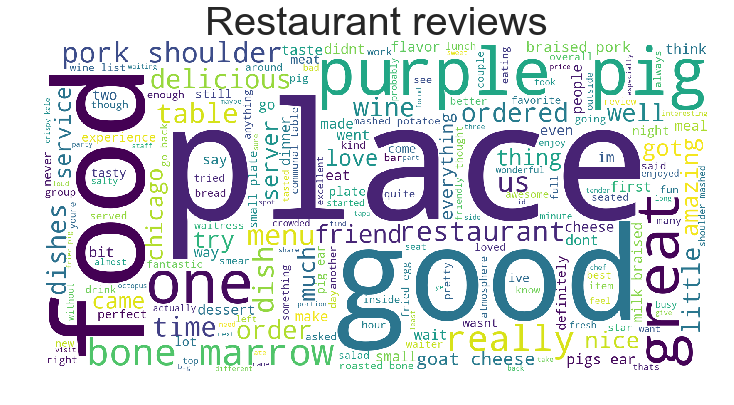

In [41]:
wc = WordCloud(background_color="white",width=1600, height=800, random_state=1, max_words=200)
# Join all strings together from the filtered description column to obtain all review text for the restaurant
wc.generate(' '.join(restau2['review_body_filtered']))


plt.figure(figsize=(15,10))
# Add title to figure
plt.title("Restaurant reviews", fontsize=40)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=10)

In [42]:
# We get the 20 most occuring words over the reviews. 

# Pass the split_it list to instance of Counter class. 
splitted = restau2['review_body_filtered'].apply(lambda x: x.split()).to_list()
flatten = [item for sublist in splitted for item in sublist]
counter = Counter(flatten) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = counter.most_common(20) 
most_occur

[('good', 1074),
 ('pig', 1057),
 ('food', 1040),
 ('pork', 983),
 ('place', 982),
 ('great', 894),
 ('wine', 894),
 ('like', 774),
 ('fried', 690),
 ('purple', 673),
 ('cheese', 660),
 ('bone', 626),
 ('one', 625),
 ('really', 603),
 ('marrow', 599),
 ('wait', 592),
 ('us', 584),
 ('would', 571),
 ('go', 520),
 ('menu', 512)]

In [43]:
#Now we add a column which has the sentiment values of the each review posted for BBQ Supply Co, to see how the 
#author of this review feels about the restaurant.

#Create Text Blob Object and draw out the sentiment of each review by returning a value between -1.0 (extreme negative) 
#and 1.0 (extreme positive).
restau2['sentiment_analysis'] = restau2['review_body_filtered'].apply(lambda x: TextBlob(x).sentiment.polarity)
restau2 = restau2.sort_values(by='sentiment_analysis', ascending=False)
restau2[:10]

,review_body,Date,review ID,reviewer ID,product ID,useful,funny,cool,star_rating,Year,Month,Day,year_of_review,review_body_filtered,sentiment_analysis
5630,Simply wonderful\n,2011-10-29,I91z9xKfv0pz3vQj1kN47Q,qG4R3VVM8RkmEaQQVEEVJg,boE4Ahsssqic7o5wQLI04w,0,0,0,5,2011,10,29,2011,simply wonderful,1.000000
5499,"2nd time here, simply awesome!\n",2011-05-26,UEyxFR006gnRQuV1b1GclA,s6Co7kYTZCrJQPuuX8enBA,boE4Ahsssqic7o5wQLI04w,0,0,0,5,2011,5,26,2011,nd time simply awesome,1.000000
4824,"If you like cheese, try the board of 3 for $19...",2012-06-18,3Tygj6xf8,WTWE5o5InWA_5-v66EfqoQ,boE4Ahsssqic7o5wQLI04w,0,0,0,5,2012,6,18,2012,like cheese try board beets cream cheese antip...,0.950000
5329,Best roasted bone marrow since Paris; our othe...,2011-11-06,qQY,f3jPNolsqQwHlSGWWaR_zg,boE4Ahsssqic7o5wQLI04w,0,0,0,5,2011,11,6,2011,best roasted bone marrow since paris favorites...,0.933333
5435,"Delicious Food, Excellent service, Great ambia...",2011-10-05,Y2O8p7eIsk8YJrzyKUeX3g,xJ0LlAH62RtS9dGc_W2GMg,boE4Ahsssqic7o5wQLI04w,0,0,0,5,2011,10,5,2011,delicious food excellent service great ambiance,0.933333
5566,"Awesome!!! Everything was great. Bone marrow, ...",2011-02-07,no8ryNCDQ4FmpWAY-BCQgA,RIVQo_fQvm6EyOJLKwEHeg,boE4Ahsssqic7o5wQLI04w,0,0,0,5,2011,2,7,2011,awesome everything great bone marrow lardo bru...,0.880000
4807,1st time patron and I was delighted! Roasted B...,2012-06-13,wVuIkUscISqgOCcGzFSPHA,eMR-Qu24heVVzFkUtnrXzQ,boE4Ahsssqic7o5wQLI04w,0,0,0,4,2012,6,13,2012,st time patron delighted roasted bone marrow a...,0.875000
5521,Loved it!! Espesh the milk braised pork should...,2011-02-27,wDZEDMqADuugsWpKH6DIXQ,pu_Aw_LpqAgUyaZkiY8HyA,boE4Ahsssqic7o5wQLI04w,0,0,0,5,2011,2,27,2011,loved espesh milk braised pork shoulder wasnt ...,0.850000
5546,"YUM....delicious Barcelona-style tapas, and an...",2011-04-03,1MO,UvnkH6DyYFAPxwbT4RwzRQ,boE4Ahsssqic7o5wQLI04w,0,0,0,4,2011,4,3,2011,yumdelicious barcelonastyle tapas awesome wine...,0.825000
4949,PHENOMENAL. Just go. You'll be happy you did. ...,2011-10-09,4zHj14J75rPCXRtYhv858g,mHWX7OowVdndZ0y6q0L4MA,boE4Ahsssqic7o5wQLI04w,0,0,0,5,2011,10,9,2011,phenomenal go youll happy tried crispy pig ear...,0.820000


In [44]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

#import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [45]:
# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in restau2['review_body_filtered']]

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aymenayadi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
tweets_nsw[0]

['simply', 'wonderful']

In [47]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw]

# View bigrams for the first tweet
terms_bigram[0]

[('simply', 'wonderful')]

In [48]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('purple', 'pig'), 628),
 (('bone', 'marrow'), 514),
 (('pork', 'shoulder'), 434),
 (('goat', 'cheese'), 243),
 (('braised', 'pork'), 239),
 (('milk', 'braised'), 203),
 (('pigs', 'ear'), 186),
 (('mashed', 'potatoes'), 154),
 (('wine', 'list'), 149),
 (('roasted', 'bone'), 137),
 (('fried', 'egg'), 136),
 (('small', 'plates'), 133),
 (('go', 'back'), 122),
 (('shoulder', 'mashed'), 101),
 (('pig', 'ears'), 96),
 (('crispy', 'kale'), 84),
 (('bread', 'balls'), 78),
 (('really', 'good'), 77),
 (('pork', 'neck'), 75),
 (('pig', 'ear'), 71)]

In [49]:
bigram_df = pd.DataFrame(bigram_counts.most_common(10),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(purple, pig)",628
1,"(bone, marrow)",514
2,"(pork, shoulder)",434
3,"(goat, cheese)",243
4,"(braised, pork)",239
5,"(milk, braised)",203
6,"(pigs, ear)",186
7,"(mashed, potatoes)",154
8,"(wine, list)",149
9,"(roasted, bone)",137


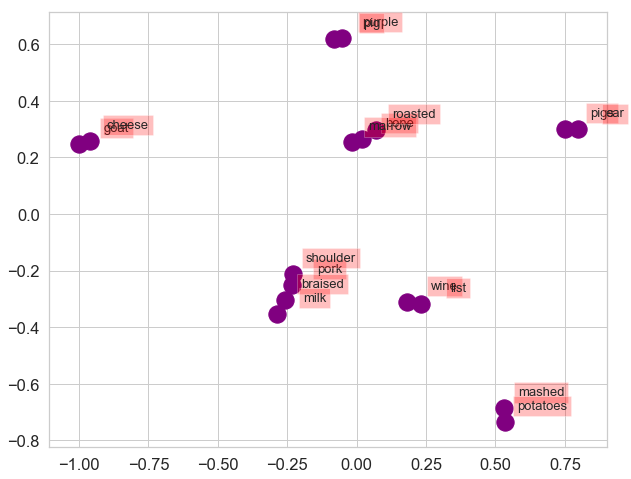

In [50]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

## Food poisoning

In [51]:
# Sentiment Analysis libraries
from textblob import TextBlob
import nltk
from newspaper import Article

In order to find out which business are more likely facing food poisoning, let's make make sentiment analysis over all the reviews.

In [52]:
restaurants_reviews.head()

,review_body,Date,review ID,reviewer ID,product ID,useful,funny,cool,star_rating,Year,Month,Day,year_of_review,review_body_filtered
0,"Unlike Next, which we'd eaten at the previous ...",2012-09-22,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,0,0,0,5,2012,9,22,2012,unlike next wed eaten previous night dish comp...
1,Probably one of the best meals I've had ever. ...,2012-09-22,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,0,0,0,5,2012,9,22,2012,probably one best meals ive ever performance f...
2,Service was impeccable. Experience and present...,2012-09-19,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,0,0,2,3,2012,9,19,2012,service impeccable experience presentation coo...
3,"The problem with places like this, given the e...",2012-09-06,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,3,0,8,3,2012,9,6,2012,problem places like given exhorbitant cost med...
4,I have no idea how to write my review - dining...,2012-09-09,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,0,2,1,5,2012,9,9,2012,idea write review dining alinea brings whole d...


### b. Business with most One Star Reviews 

In [53]:
# We analyse ratings of reviews by getting the restaurants with most Five Star rating scores. 
ratings = restaurants_reviews[restaurants_reviews.star_rating == 1].groupby(['product ID', 'star_rating']).agg('size').to_frame('count').reset_index().sort_values(by='count', ascending=False)
ratings[:20]

,product ID,star_rating,count
57,_n3OmwreEGPQmiHKklsD8w,1,58
69,ibreTMGGaQSanZttUchjKg,1,50
100,yBRaSkuYwFhYEoucDyD0lA,1,45
21,AqgG-1aD6JYj9D6OmBWO3w,1,44
2,08X_5WTOVNvk4SgPRKBjjQ,1,44
27,DXwSYgiXqIVNdO9dazel6w,1,43
73,m5_GCJP2W4zEJnyVgxa3eA,1,40
12,50gFzdVglOz88eFJ6v-26A,1,40
68,hylBw5ND7XyPldM6BN28vw,1,38
78,n3VjBryfinjRG1W3LWsPBQ,1,38


### _n3OmwreEGPQmiHKklsD8w

In [54]:
restau_pois_1 = restaurants_reviews[restaurants_reviews['product ID'] == '_n3OmwreEGPQmiHKklsD8w']
restau_pois_1.head()

,review_body,Date,review ID,reviewer ID,product ID,useful,funny,cool,star_rating,Year,Month,Day,year_of_review,review_body_filtered
39070,"They open a new restaurant Golf rd near Niles,...",2012-09-05,x10hzIua,231oec4R58UPf2Bwo0vYaw,_n3OmwreEGPQmiHKklsD8w,0,0,0,4,2012,9,5,2012,open new restaurant golf rd near niles il well...
39071,Last night after unpacking boxes all day my fr...,2012-08-17,8-MIRcrZaQZqHujHEKRteg,_MAbt_ZCru0MgpR7wpzhTA,_n3OmwreEGPQmiHKklsD8w,1,0,1,2,2012,8,17,2012,last night unpacking boxes day friend decided ...
39074,I'm going to have to agree with some of the re...,2012-07-14,sBGLPc4bm4KkZ4iQZGZDFQ,cCjkjhlH05Fpsef9kna3NA,_n3OmwreEGPQmiHKklsD8w,0,0,1,2,2012,7,14,2012,im going agree reviews service really suck ser...
39076,OK... maybe 3.5 stars\n,2012-09-22,cLAvvLXRZvEKm9YMJKtmwg,X6YxH45bscX4Sjqtdy30uA,_n3OmwreEGPQmiHKklsD8w,1,1,1,3,2012,9,22,2012,ok maybe stars
39078,Great place to eat when you want BBQ! I love t...,2012-09-18,u7RIjJacO2FMif4taPmH2A,gwV1JsTSRk0gqg7HlNKpeg,_n3OmwreEGPQmiHKklsD8w,1,1,1,4,2012,9,18,2012,great place eat want bbq love fact let cook fr...


In [55]:
# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in restau_pois_1['review_body_filtered']]

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aymenayadi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets_nsw]

# View bigrams for the first tweet
terms_bigram[0]

[('open', 'new'),
 ('new', 'restaurant'),
 ('restaurant', 'golf'),
 ('golf', 'rd'),
 ('rd', 'near'),
 ('near', 'niles'),
 ('niles', 'il'),
 ('il', 'well'),
 ('well', 'like'),
 ('like', 'space'),
 ('space', 'really'),
 ('really', 'like'),
 ('like', 'side'),
 ('side', 'dishes'),
 ('dishes', 'foods'),
 ('foods', 'really'),
 ('really', 'tasty'),
 ('tasty', 'one'),
 ('one', 'best'),
 ('best', 'korean'),
 ('korean', 'place'),
 ('place', 'chicago'),
 ('chicago', 'thing'),
 ('thing', 'grill'),
 ('grill', 'smoky')]

In [57]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('korean', 'bbq'), 170),
 (('side', 'dishes'), 135),
 (('san', 'soo'), 75),
 (('gab', 'san'), 66),
 (('soo', 'gab'), 65),
 (('korean', 'food'), 62),
 (('seafood', 'pancake'), 32),
 (('late', 'night'), 31),
 (('short', 'ribs'), 31),
 (('parking', 'lot'), 29),
 (('first', 'time'), 25),
 (('food', 'good'), 24),
 (('smell', 'like'), 23),
 (('dont', 'know'), 23),
 (('bbq', 'place'), 21),
 (('food', 'great'), 21),
 (('korean', 'restaurant'), 21),
 (('smelling', 'like'), 21),
 (('best', 'korean'), 20),
 (('really', 'good'), 20)]

In [58]:
bigram_df = pd.DataFrame(bigram_counts.most_common(10),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(korean, bbq)",170
1,"(side, dishes)",135
2,"(san, soo)",75
3,"(gab, san)",66
4,"(soo, gab)",65
5,"(korean, food)",62
6,"(seafood, pancake)",32
7,"(late, night)",31
8,"(short, ribs)",31
9,"(parking, lot)",29


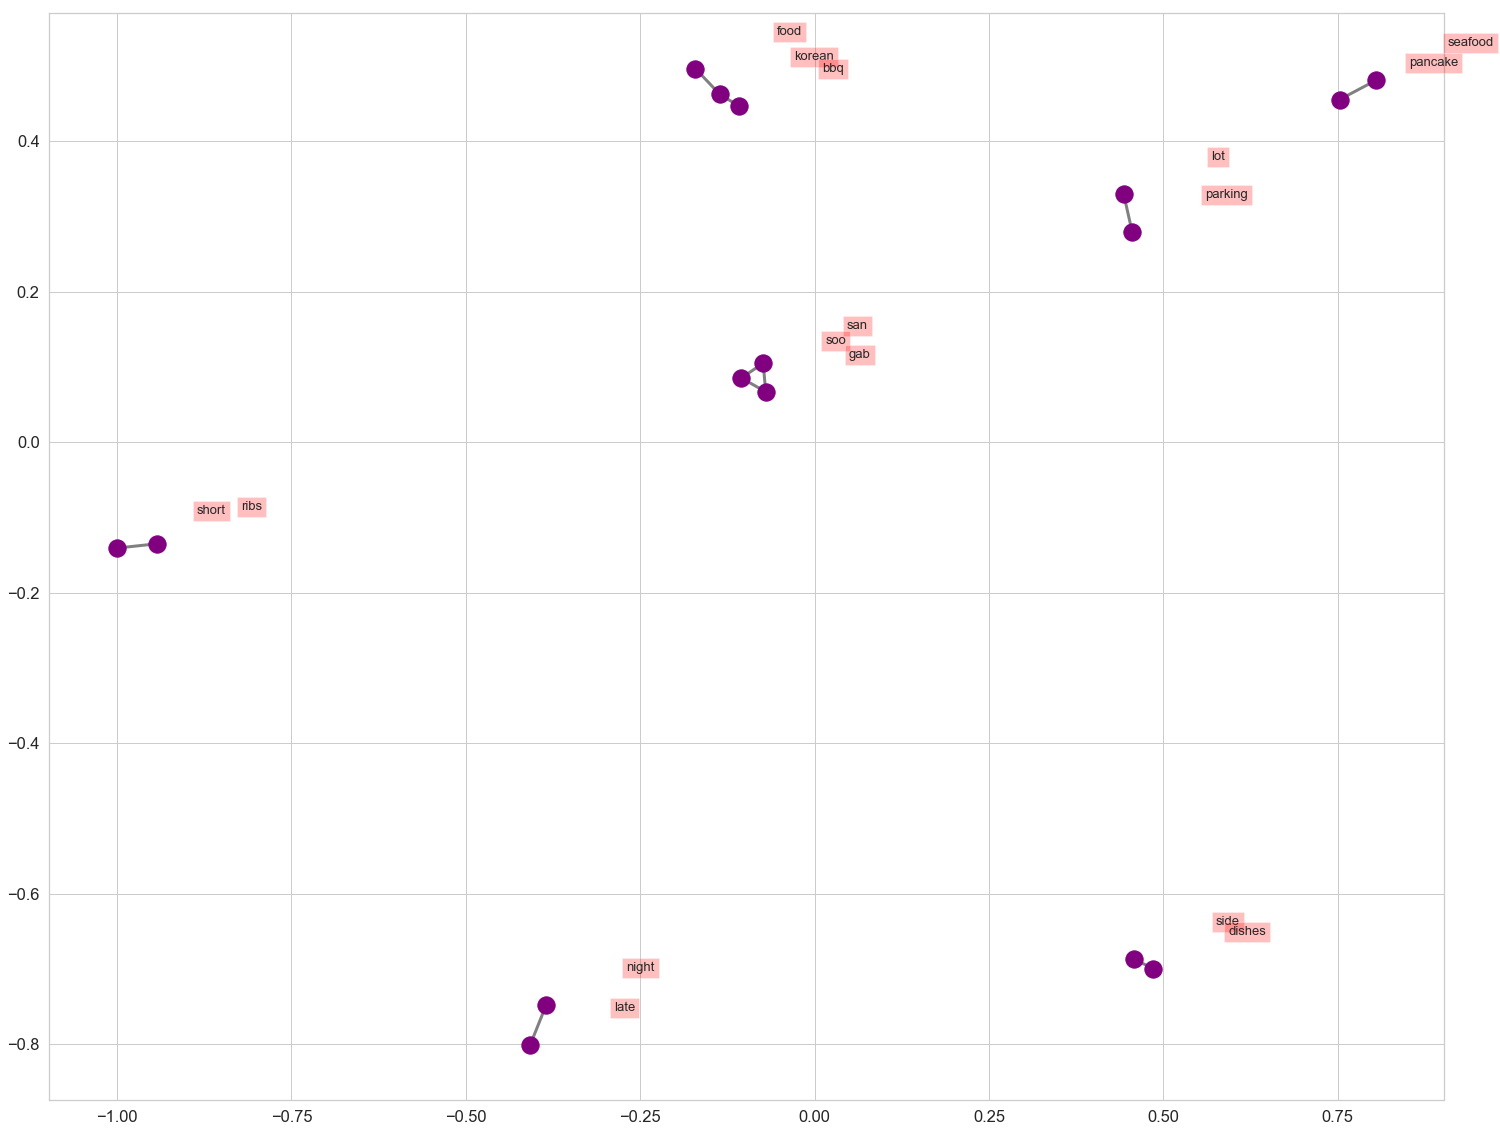

In [59]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(25, 20))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [60]:
# We get sentiment analysis for all reviews and sort them by most negative reviews

#Create Text Blob Object
#NOTE: You can treat TextBlob objects as if they were Python strings that learned how to do Natural Language Processing.
#restaurants_reviews["description_filtered"]= restaurants_reviews.apply(lambda row : preprocess(row["description"]) , axis = 1)
restaurants_reviews['sentiment_analysis'] = restaurants_reviews['review_body_filtered'].apply(lambda x: TextBlob(x).sentiment.polarity)
restaurants_reviews.sort_values(by='sentiment_analysis', ascending=True, inplace=True)
restaurants_reviews[:20]

,review_body,Date,review ID,reviewer ID,product ID,useful,funny,cool,star_rating,Year,Month,Day,year_of_review,review_body_filtered,sentiment_analysis
32215,"Brussell sprout salad. Yeah, I know, it sounds...",2011-01-18,N3V0V-9NdI4qCNEfSRM2VQ,mMhw2UFbTrMpBKMWr6hNMA,8d_DiHWB-pjBVW3a7D8EWg,0,0,0,4,2011,1,18,2011,brussell sprout salad yeah know sounds awful t...,-1.000
25618,Outrageously yummy! Go for the tasting menu.\n,2011-11-02,FD7tOyhQTXVttFFIQQp5Fg,kvSB3RE7mbIw12oCrTZa8Q,o4NcUfco7JxOcyfKFWyAhg,0,0,0,5,2011,11,2,2011,outrageously yummy go tasting menu,-1.000
33754,food so so service evil\n,2012-05-19,4kKuX,tPA-sADpemoeEXFePGiJrA,6PQTqW9j-sriDBQyQCJbjw,0,0,0,2,2012,5,19,2012,food service evil,-1.000
53836,Horrible! Way overpriced for Chicago. Order ne...,2012-08-23,cqjf2qIwkvwq-xKMn4Zaag,Pt6XYGL4VmtW_7freshicw,boE4Ahsssqic7o5wQLI04w,0,0,0,1,2012,8,23,2012,horrible way overpriced chicago order never sh...,-1.000
55471,"Very fancy.. Take note of that. Ha, anyways, t...",2011-08-04,enRRaC-75jyUhQ0jEFwwWA,ppnCq6lYLAAR2NccB3ltcw,JMa9cTNQA5mm4GbR2W8Oiw,0,0,0,4,2011,8,4,2011,fancy take note ha anyways bianca con rugula t...,-1.000
58089,Horrible service. Food comes out one at a time...,2011-02-26,Aq5B1JcZ4P2PF1mP-6LeVg,2h1G5ldDBvAaSBG_eye-bw,yBRaSkuYwFhYEoucDyD0lA,0,0,0,1,2011,2,26,2011,horrible service food comes one time forgot re...,-1.000
57890,Horrible service. That by itself is a reason t...,2010-07-08,vI5vKjJDVAElfrBBBsUMCg,aKZoKOqwJsDQco_6zgjmTQ,JDNZxz0ud7zhuPo5pqznMA,0,0,0,1,2010,7,8,2010,horrible service reason never return,-1.000
57655,I almost slipped and fell twice!! The floor is...,2010-05-17,MFSuJzVNxBBGYPT804nZhw,3t6WTPGecnAoM36g0TTmXQ,cQnY_VneZisfUAqcbuEuKg,0,0,0,1,2010,5,17,2010,almost slipped fell twice floor greasy acciden...,-1.000
31402,It wad horrible. We waited 40minutes for 2 egg...,2011-06-14,o71pBDrgvHsGgj4lkT19dw,QjZzl0uIsB12jT7mVPbTXg,DBtXy8wcPsVr80oFfz-CbA,0,0,1,1,2011,6,14,2011,wad horrible waited minutes eggs strips bacon ...,-1.000
22418,I wouldn't go here again! Problems I have with...,2011-08-21,x92Q5jh2CSGL1EMLn-Z8nA,cJd7HnlATnVtblrfibzhvA,F7IQngaDDBgYvhA3U31q-g,0,0,1,1,2011,8,21,2011,wouldnt go problems place booze hell theres li...,-1.000


### 8d_DiHWB-pjBVW3a7D8EWg

In [75]:
restau_pois_2 = restaurants_reviews[restaurants_reviews['product ID'] == '6PQTqW9j-sriDBQyQCJbjw']
restau_pois_2.head()

,review_body,Date,review ID,reviewer ID,product ID,useful,funny,cool,star_rating,Year,Month,Day,year_of_review,review_body_filtered,sentiment_analysis
33754,food so so service evil\n,2012-05-19,4kKuX,tPA-sADpemoeEXFePGiJrA,6PQTqW9j-sriDBQyQCJbjw,0,0,0,2,2012,5,19,2012,food service evil,-1.000000
33810,I feel like a stalwart has just let me down......,2010-03-12,W06cyK,WCmaY55rrGuz_igGOxqJ6Q,6PQTqW9j-sriDBQyQCJbjw,0,0,0,3,2010,3,12,2010,feel like stalwart let downlike chicago instit...,-0.219276
58008,"Been here twice, food and service are solid, a...",2011-07-24,UXeCmMQRDjpg2QdCx12B4Q,3l7FUV_9R0HXceIHrz-XEg,6PQTqW9j-sriDBQyQCJbjw,0,0,0,4,2011,7,24,2011,twice food service solid always come away left...,-0.122024
33868,Solid little Italian place in Lakeview. Went h...,2010-05-06,pr3cmlA03ZKJW4YDRQq0YA,JGxtSUnA93ZFFOm50Z7J4A,6PQTqW9j-sriDBQyQCJbjw,0,1,0,4,2010,5,6,2010,solid little italian place lakeview went boy f...,-0.075000
58010,Went out for a late meal after a night of club...,2011-05-29,NvZuPu52BlKFmSVF1S-s2Q,qjnOKQTD5elgm58YGWYa9A,6PQTqW9j-sriDBQyQCJbjw,0,0,0,1,2011,5,29,2011,went late meal night clubbin expecting nice qu...,-0.061538


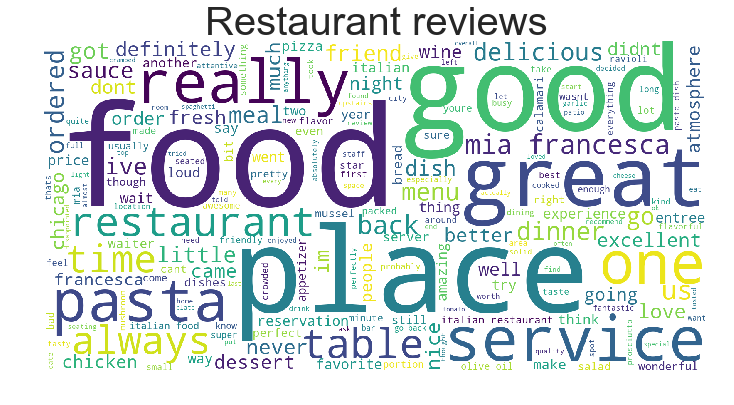

In [76]:
wc = WordCloud(background_color="white",width=1600, height=800, random_state=1, max_words=200)
# Join all strings together from the filtered description column to obtain all review text for the restaurant
wc.generate(' '.join(restau_pois_2['review_body_filtered']))


plt.figure(figsize=(15,10))
# Add title to figure
plt.title("Restaurant reviews", fontsize=40)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=10)

In [68]:
# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in restau_pois_2['review_body_filtered']]

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aymenayadi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets_nsw]

# View bigrams for the first tweet
terms_bigram[0]

[('brussell', 'sprout'),
 ('sprout', 'salad'),
 ('salad', 'yeah'),
 ('yeah', 'know'),
 ('know', 'sounds'),
 ('sounds', 'awful'),
 ('awful', 'trust')]

In [64]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('oatmeal', 'shake'), 180),
 (('costa', 'rican'), 118),
 (('veggie', 'burrito'), 54),
 (('costa', 'rica'), 43),
 (('rican', 'food'), 40),
 (('go', 'back'), 36),
 (('pepito', 'sandwich'), 32),
 (('next', 'time'), 31),
 (('black', 'beans'), 30),
 (('vegetarian', 'burrito'), 29),
 (('oatmeal', 'shakes'), 29),
 (('food', 'great'), 29),
 (('gallo', 'pinto'), 28),
 (('food', 'good'), 27),
 (('spinach', 'cheese'), 26),
 (('great', 'food'), 26),
 (('sweet', 'plantains'), 24),
 (('highly', 'recommend'), 23),
 (('first', 'time'), 23),
 (('love', 'place'), 23)]

In [65]:
bigram_df = pd.DataFrame(bigram_counts.most_common(10),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(oatmeal, shake)",180
1,"(costa, rican)",118
2,"(veggie, burrito)",54
3,"(costa, rica)",43
4,"(rican, food)",40
5,"(go, back)",36
6,"(pepito, sandwich)",32
7,"(next, time)",31
8,"(black, beans)",30
9,"(vegetarian, burrito)",29


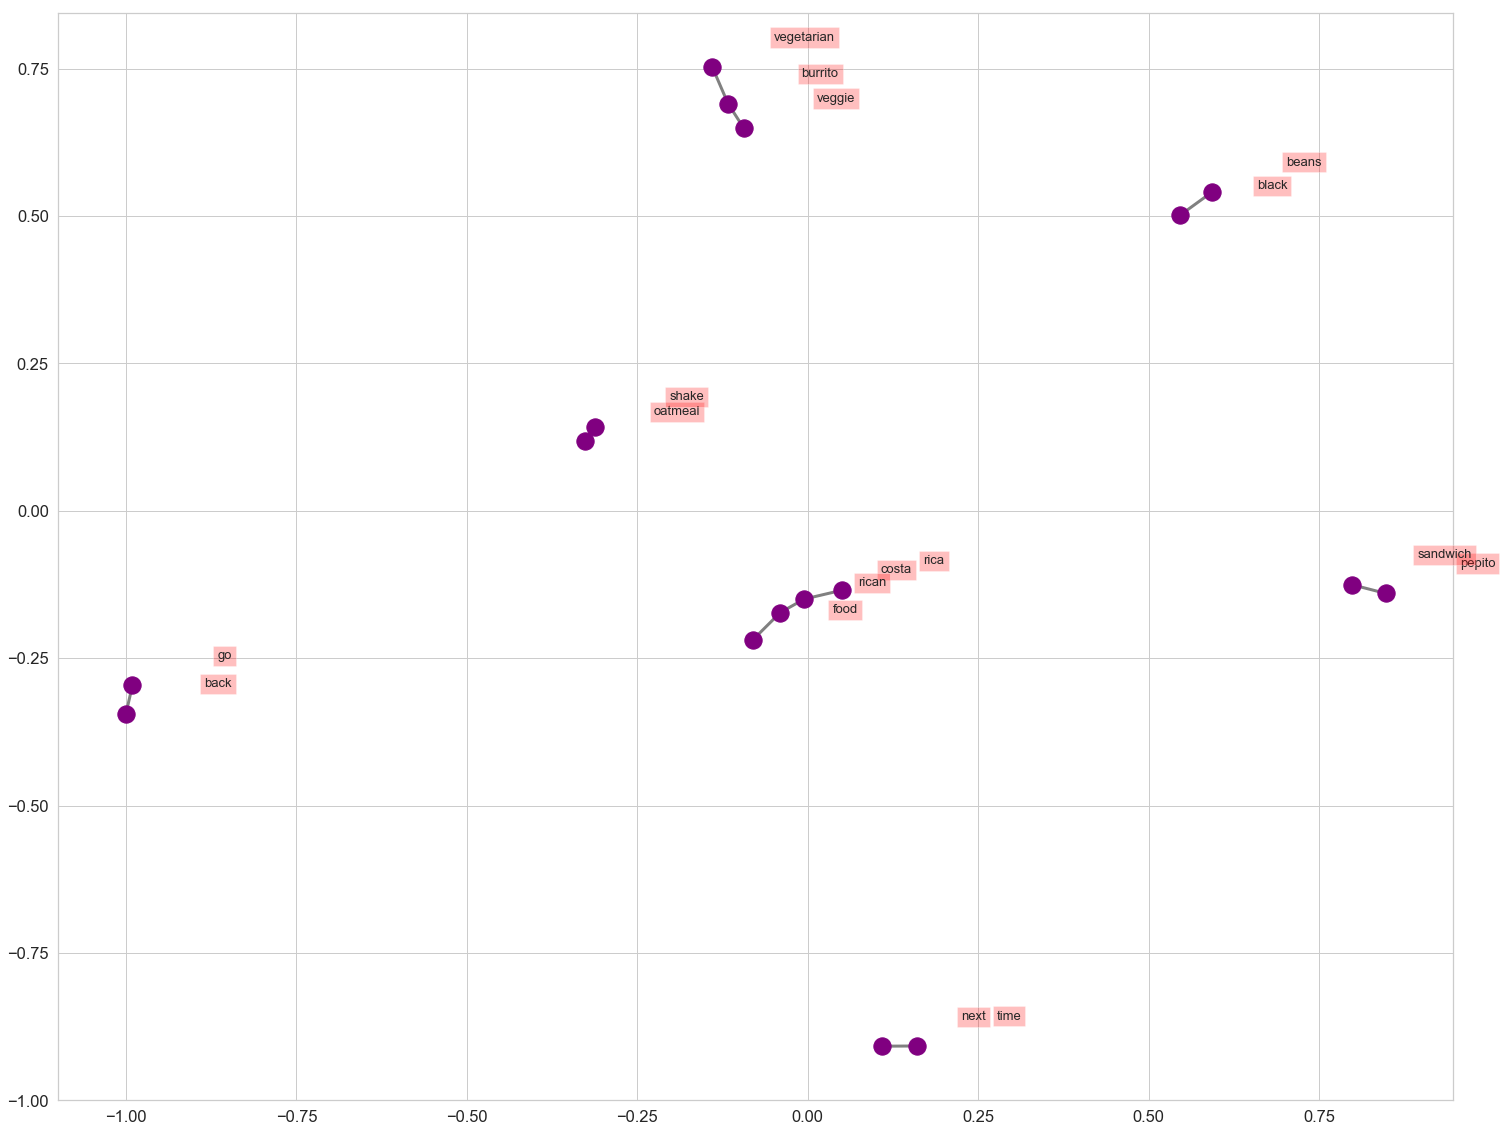

In [66]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(25, 20))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [ ]:
#